### `Project - MovieLens Data Analysis`

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.


### `Objective:`
- To implement the techniques learnt as a part of the course.

### `Learning Outcomes:`
- Exploratory Data Analysis

- Visualization using Python

- Pandas – groupby, merging 


### `Domain` 
- Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

### `Datasets Information:`


*rating.csv:* It contains information on ratings given by the users to a particular movie.
- user id: id assigned to every user
- movie id: id assigned to every movie
- rating: rating given by the user
- timestamp: Time recorded when the user gave a rating



*movie.csv:* File contains information related to the movies and their genre.
- movie id: id assigned to every movie
- movie title: Title of the movie
- release date: Date of release of the movie
- Action: Genre containing binary values (1 - for action 0 - not action)
- Adventure: Genre containing binary values (1 - for adventure 0 - not adventure)
- Animation: Genre containing binary values (1 - for animation 0 - not animation)
- Children’s: Genre containing binary values (1 - for children's 0 - not children's)
- Comedy: Genre containing binary values (1 - for comedy 0 - not comedy)
- Crime: Genre containing binary values (1 - for crime 0 - not crime)
- Documentary: Genre containing binary values (1 - for documentary 0 - not documentary)
- Drama: Genre containing binary values (1 - for drama 0 - not drama)
- Fantasy: Genre containing binary values (1 - for fantasy 0 - not fantasy)
- Film-Noir: Genre containing binary values (1 - for film-noir 0 - not film-noir)
- Horror: Genre containing binary values (1 - for horror 0 - not horror)
- Musical: Genre containing binary values (1 - for musical 0 - not musical)
- Mystery: Genre containing binary values (1 - for mystery 0 - not mystery)
- Romance: Genre containing binary values (1 - for romance 0 - not romance)
- Sci-Fi: Genre containing binary values (1 - for sci-fi 0 - not sci-fi)
- Thriller: Genre containing binary values (1 - for thriller 0 - not thriller)
- War: Genre containing binary values (1 - for war 0 - not war)
- Western: Genre containing binary values (1 - for western - not western)



*user.csv:* It contains information of the users who have rated the movies.
- user id: id assigned to every user
- age: Age of the user
- gender: Gender of the user
- occupation: Occupation of the user
- zip code: Zip code of the use


**`Please provide you insights wherever necessary.`**

### 1. Import the necessary packages - 2.5 marks

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt #seaborn is based on matplotlib
sns.set(color_codes=True)
%matplotlib inline

### 2. Read the 3 datasets into dataframes - 2.5 marks

In [2]:
ratingsdf = pd.read_csv("C:\\Anil\\AI And ML\\data.csv")
moviedf = pd.read_csv("C:\\Anil\\AI And ML\\item.csv")
userdf = pd.read_csv("C:\\Anil\\AI And ML\\user.csv")

### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks
 - Note that you will need to do it for all the three datasets seperately

In [3]:
print(ratingsdf.info)
print(ratingsdf.shape)
print(ratingsdf.describe())
ratingsdf.isnull().sum()   #number of missing values in the data

<bound method DataFrame.info of        user id  movie id  rating  timestamp
0          196       242       3  881250949
1          186       302       3  891717742
2           22       377       1  878887116
3          244        51       2  880606923
4          166       346       1  886397596
...        ...       ...     ...        ...
99995      880       476       3  880175444
99996      716       204       5  879795543
99997      276      1090       1  874795795
99998       13       225       2  882399156
99999       12       203       3  879959583

[100000 rows x 4 columns]>
(100000, 4)
            user id       movie id         rating     timestamp
count  100000.00000  100000.000000  100000.000000  1.000000e+05
mean      462.48475     425.530130       3.529860  8.835289e+08
std       266.61442     330.798356       1.125674  5.343856e+06
min         1.00000       1.000000       1.000000  8.747247e+08
25%       254.00000     175.000000       3.000000  8.794487e+08
50%       447.00

user id      0
movie id     0
rating       0
timestamp    0
dtype: int64

In [4]:
print(moviedf.info) 
print(moviedf.shape)
print(moviedf.isnull().sum())  #number of missing values in the data
moviedf.describe()  

<bound method DataFrame.info of       movie id                          movie title release date  unknown  \
0            1                           Toy Story   01-Jan-1995        0   
1            2                           GoldenEye   01-Jan-1995        0   
2            3                          Four Rooms   01-Jan-1995        0   
3            4                          Get Shorty   01-Jan-1995        0   
4            5                             Copycat   01-Jan-1995        0   
...        ...                                  ...          ...      ...   
1676      1678                          Mat' i syn   06-Feb-1998        0   
1677      1679                           B. Monkey   06-Feb-1998        0   
1678      1680                       Sliding Doors   01-Jan-1998        0   
1679      1681                        You So Crazy   01-Jan-1994        0   
1680      1682  Scream of Stone (Schrei aus Stein)   08-Mar-1996        0   

      Action  Adventure  Animation  Childre

,movie id,unknown,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000,1681.000000
mean,841.841761,0.000595,0.149316,0.080309,0.024985,0.072576,0.300416,0.064842,0.029744,0.431291,0.013087,0.014277,0.054729,0.033314,0.036288,0.146936,0.060083,0.149316,0.042237,0.016062
std,485.638077,0.024390,0.356506,0.271852,0.156126,0.259516,0.458576,0.246321,0.169931,0.495404,0.113683,0.118667,0.227519,0.179507,0.187061,0.354148,0.237712,0.356506,0.201189,0.125751
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,422.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,842.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1262.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1682.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
print(userdf.info)    
print(userdf.shape)   
print(userdf.isnull().sum()) #number of missing values in the data
userdf.describe()  

<bound method DataFrame.info of      user id  age gender     occupation zip code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>
(943, 5)
user id       0
age           0
gender        0
occupation    0
zip code      0
dtype: int64


,user id,age
count,943.000000,943.000000
mean,472.000000,34.051962
std,272.364951,12.192740
min,1.000000,7.000000
25%,236.500000,25.000000
50%,472.000000,31.000000
75%,707.500000,43.000000
max,943.000000,73.000000


### 4. Find the number of movies per genre using the item data - 2.5 marks

In [6]:
moviedf.sum()

movie id                                                  1415136
movie title     Toy Story GoldenEye Four Rooms Get Shorty Copy...
release date    01-Jan-199501-Jan-199501-Jan-199501-Jan-199501...
unknown                                                         1
Action                                                        251
Adventure                                                     135
Animation                                                      42
Childrens                                                     122
Comedy                                                        505
Crime                                                         109
Documentary                                                    50
Drama                                                         725
Fantasy                                                        22
Film-Noir                                                      24
Horror                                                         92
Musical   

### 5. Drop the movie where the genre is unknown - 2.5 marks

In [7]:
print(moviedf.loc[moviedf['unknown']==1])
moviedf = moviedf.drop(1371, axis=0)
print(moviedf.loc[moviedf['unknown']==1])

      movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Fantasy  Film-Noir  Horror  \
1371          0          0       0      0  ...        0          0       0   

      Musical  Mystery  Romance  Sci-Fi  Thriller  War  Western  
1371        0        0        0       0         0    0        0  

[1 rows x 22 columns]
Empty DataFrame
Columns: [movie id, movie title, release date, unknown, Action, Adventure, Animation, Childrens, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western]
Index: []

[0 rows x 22 columns]


### 6. Find the movies that have more than one genre - 5 marks

hint: use sum on the axis = 1

Display movie name, number of genres for the movie in dataframe

and also print(total number of movies which have more than one genres)

In [8]:
column_list = list(moviedf)
column_list.remove("movie id")
moviedf["Total_Genre"] = moviedf[column_list].sum(axis=1)
#print(moviedf["Total_Genre"])
print(moviedf[['movie title', 'Total_Genre']])
print('Total number of movies which have more than one genres :', len(moviedf[(moviedf['Total_Genre']>1)]))

                              movie title  Total_Genre
0                              Toy Story             3
1                              GoldenEye             3
2                             Four Rooms             1
3                             Get Shorty             3
4                                Copycat             3
...                                   ...          ...
1676                          Mat' i syn             1
1677                           B. Monkey             2
1678                       Sliding Doors             2
1679                        You So Crazy             1
1680  Scream of Stone (Schrei aus Stein)             1

[1680 rows x 2 columns]
Total number of movies which have more than one genres : 849


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

*HINT: Use distplot for age. Use lineplot or countplot for release year.*

*HINT: Plot percentages in y-axis and categories in x-axis for ratings, gender and occupation*

*HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split() as depicted below or you could convert it to pandas datetime format and extract year (.dt.year)*

In [18]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


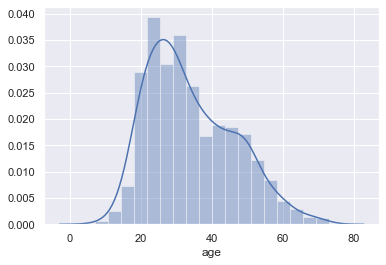

In [9]:
sns.distplot(userdf['age'])

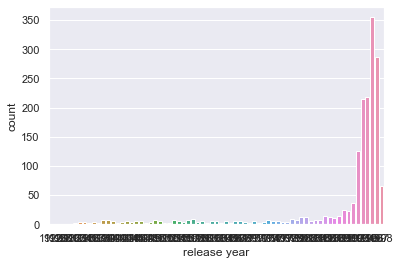

In [10]:
moviedf['release date'] = moviedf['release date'].astype('datetime64[ns]')
moviedf['release year'] = moviedf['release date'].dt.year
plot = sns.countplot(x='release year', data= moviedf)
#plot.set_xticklabels(plot.get_xticklabels(),rotation=45)

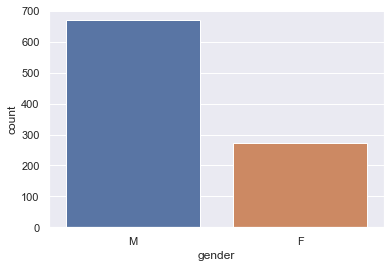

In [12]:
plot = sns.countplot(x='gender', data= userdf)

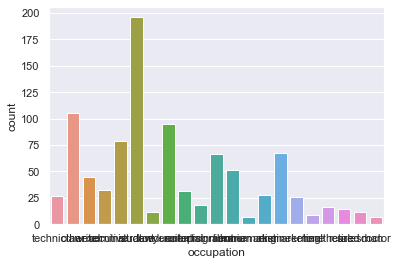

In [13]:
plot = sns.countplot(x='occupation', data= userdf)

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the **percent of number of releases in a year** as a parameter of popularity of a genre

Hint 1: You need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa. (Drop unnecessary column if there are any)

Hint 2: Find the total number of movies release in a year(use `sum(axis=1)` store that value in a new column as 'total'). Now divide the value of each genre in that year by total to get percentage number of release in a particular year.
`(df.div(df['total'], axis= 0) * 100)`

Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 3: Use groupby on the relevant column and use sum() on the same to find out the number of releases in a year/genre.  

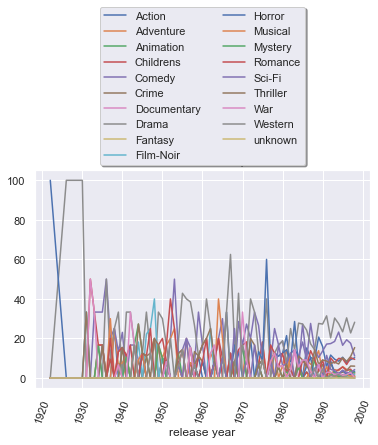

In [11]:
moviedf1 = pd.pivot_table(moviedf, index=["release year"],values=["unknown","Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"],aggfunc=np.sum)
column_list1 = list(moviedf1)
moviedf1["Total_Movies"] = moviedf1[column_list1].sum(axis=1)
moviedf2 = moviedf1.div(moviedf1['Total_Movies'], axis= 0) * 100
moviedf2.drop(columns=['Total_Movies'], inplace = True)

for i, col in enumerate(moviedf2.columns):
    moviedf2[col].plot()
    
plt.title('Genre Evolution Comparison')

plt.xticks(rotation=70)
plt.legend(moviedf2.columns, loc='lower center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hints : 

1. Find the count of ratings and average ratings for every movie.
2. Slice the movies which have ratings more than 100.
3. Sort values according to average rating such that movie which highest rating is on top.
4. Select top 25 movies.
5. You will have to use the .merge() function to get the movie titles.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

In [12]:
df1 = ratingsdf.groupby('movie id').rating.count().to_frame(name='ratingcount').reset_index()
df2 = ratingsdf.groupby('movie id').rating.mean().to_frame(name='ratingaverage').reset_index()
newratingsdf = pd.merge(df1,df2, on = "movie id", how = "inner")
df3 = newratingsdf[newratingsdf.ratingcount > 100].sort_values('ratingaverage', ascending=False)
sub_ratingsdf = df3.head(25)
sub_moviedf = moviedf[["movie id", "movie title"]]
rated_movie_titles = sub_moviedf.merge(sub_ratingsdf, on = 'movie id')
#top25_rated_movies = pd.merge(sub_moviedf,sub_ratingsdf, how = "inner", on = ["movie id"] )
top25_rated_movies = rated_movie_titles.sort_values('ratingaverage', ascending=False)
top25_rated_movies.reset_index(drop=True)

,movie id,movie title,ratingcount,ratingaverage
0,408,"Close Shave, A",112,4.491071
1,318,Schindler's List,298,4.466443
2,169,"Wrong Trousers, The",118,4.466102
3,483,Casablanca,243,4.456790
4,64,"Shawshank Redemption, The",283,4.445230
5,603,Rear Window,209,4.387560
6,12,"Usual Suspects, The",267,4.385768
7,50,Star Wars,583,4.358491
8,178,12 Angry Men,125,4.344000
9,134,Citizen Kane,198,4.292929


### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women

**compare the percentages**

1. Merge all the datasets

2. There is no need to conduct statistical tests around this. Just **compare the percentages** and comment on the validity of the above statements.

3. you might want ot use the .sum(), .div() function here.

4. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

In [13]:
data_frame = pd.merge(pd.merge(userdf,ratingsdf),moviedf)
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99990 entries, 0 to 99989
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user id       99990 non-null  int64         
 1   age           99990 non-null  int64         
 2   gender        99990 non-null  object        
 3   occupation    99990 non-null  object        
 4   zip code      99990 non-null  object        
 5   movie id      99990 non-null  int64         
 6   rating        99990 non-null  int64         
 7   timestamp     99990 non-null  int64         
 8   movie title   99990 non-null  object        
 9   release date  99990 non-null  datetime64[ns]
 10  unknown       99990 non-null  int64         
 11  Action        99990 non-null  int64         
 12  Adventure     99990 non-null  int64         
 13  Animation     99990 non-null  int64         
 14  Childrens     99990 non-null  int64         
 15  Comedy        99990 non-null  int64 

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,unknown
gender,,,,,,,,,,,,,,,,,,,
F,5442,3141,995,2232,8068,1794,187,11008,363,385,1197,1442,1314,5858,2629,5086,2189,371,0
M,20147,10612,2610,4950,21764,6261,571,28887,989,1348,4120,3512,3931,13603,10101,16786,7209,1483,0


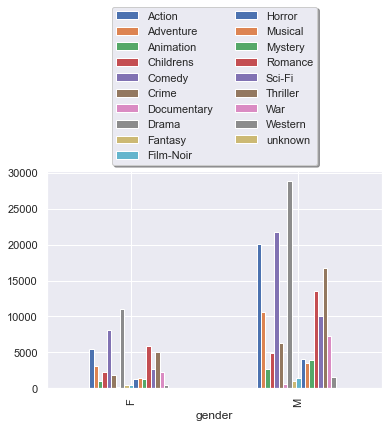

In [34]:
data_frame1 = pd.pivot_table(data_frame, index=["gender"],values=["unknown","Action","Adventure","Animation","Childrens","Comedy","Crime","Documentary","Drama","Fantasy","Film-Noir","Horror","Musical","Mystery","Romance","Sci-Fi","Thriller","War","Western"],aggfunc=np.sum)
#column_list = list(data_frame1)
#data_frame1["Total_Movies"] = data_frame1[column_list].sum(axis=1)
#data_frame2 = data_frame1.div(data_frame1['Total_Movies'], axis= 0) * 100
#moviedf2.drop(columns=['Total_Movies'], inplace = True)
data_frame1.plot(kind='bar')
#plt.xticks(rotation=0)
plt.legend(data_frame1.columns, loc='lower center', bbox_to_anchor=(0.5, 1.00), shadow=True, ncol=2)
data_frame1.head()

Men watch more Drama than Women  -- True
Women watch more Sci-Fi than men  -- False
Men watch more Romance than women  -- True